### 가정
- 수소차 충전소 위치는 변수~변수 만 고려하여 위치를 선정.
- 기존 설치된 수소차 충전소는 위 고려사항을 충분히 고려하여 만들어진 곳이다.
- 수소차 충전소는 전방 약 ~m를 커버할 수 있다.

### 분석 방법
- 고려되는 모든 변수들은 정규화
- 선형회귀분석을 이용해 구한 데이터로부터 수소차 충전소 위치에 영향을 주는 요소의 관계를 분석(Linear Regression)
- INPUT : 차량등록수, 생산가능인구수, 교통노드,	건물연면적, 관광상권, 부동산상권,	생활서비스상권,	소매상권, 숙박상권,	스포츠상권, 음식상권, 학문상권, 유치원초중고, 화재발생건수, 교통량
         
- OUTPUT : 고려되는 요소들과 충전소 사이의 상관계수


### 1.데이터 불러오기

In [68]:
import pandas as pd
df1=pd.read_csv("C:/Users/Kim Won Gyeung/Desktop/공모전/2021 빅데이터 분석 및 아이디어 공모전/2.사용_데이터(정제데이터)/4. 선형회귀 돌릴 데이터/수소차종속변수_선형회귀(0제외).csv", encoding ="cp949")

In [69]:
df = df1.iloc[:,3:]

In [70]:
df

,차량등록수,생산가능인구수,교통노드,건물연면적,관광상권,부동산상권,생활서비스상권,소매상권,숙박상권,스포츠상권,음식상권,학문상권,유치원초중고,화재발생건수,교통량,종속변수_수소차
0,0,95,0,1037.35,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0.00,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22908,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,1,0
22909,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,1,0
22910,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,1,0
22911,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,1,0


### 1-1. EDA (이상치 확인하기)

In [71]:
df.columns

Index(['차량등록수', '생산가능인구수', '교통노드', '건물연면적', '관광상권', '부동산상권', '생활서비스상권', '소매상권',
       '숙박상권', '스포츠상권', '음식상권', '학문상권', '유치원초중고', '화재발생건수', '교통량', '종속변수_수소차'],
      dtype='object')

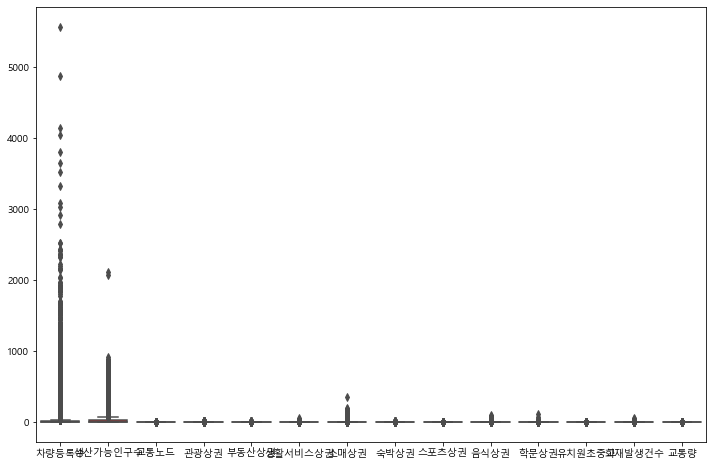

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
font_path = 'c://Windows//Fonts//malgun.ttf' # 폰트 파일 위치
font_name = font_manager.FontProperties( fname = font_path ).get_name()
rc( 'font', family = font_name )


#warning 메시지 표시 안하게 하기
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(12,8))
sns.boxplot(data = df[['차량등록수', '생산가능인구수', '교통노드', '관광상권','부동산상권', '생활서비스상권', '소매상권', '숙박상권', '스포츠상권', '음식상권', '학문상권', '유치원초중고','화재발생건수', '교통량']],color='red')
plt.show()

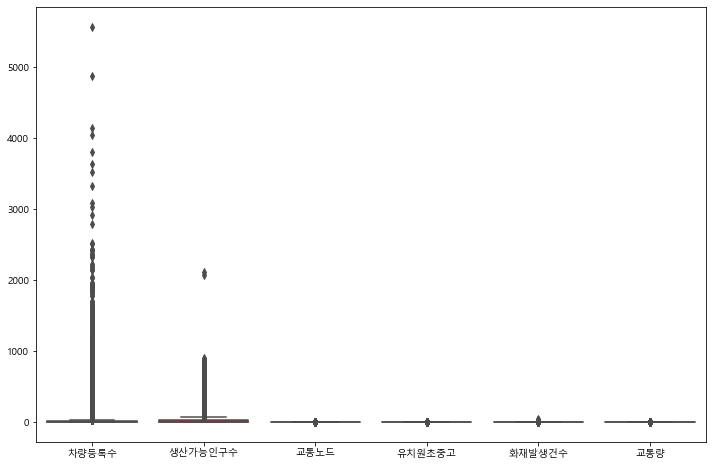

In [73]:
# 상권 이상치 확인
plt.figure(figsize=(12,8))
sns.boxplot(data = df[['차량등록수', '생산가능인구수', '교통노드','유치원초중고','화재발생건수', '교통량']],color='red')
plt.show()

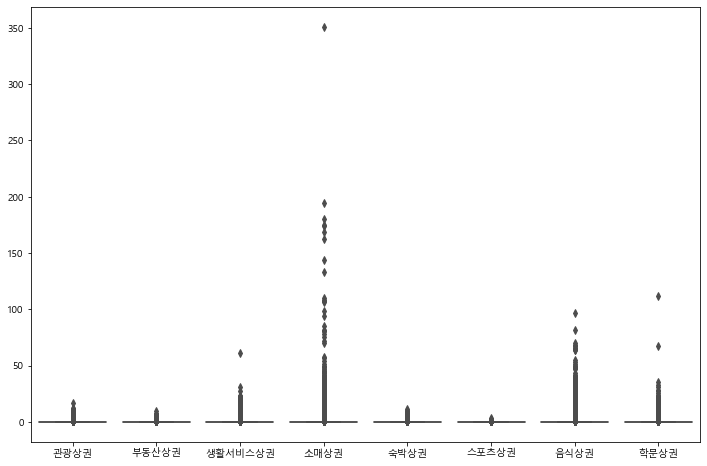

In [74]:
# 상권 이상치 확인
plt.figure(figsize=(12,8))
sns.boxplot(data = df[['관광상권','부동산상권', '생활서비스상권', '소매상권', '숙박상권', '스포츠상권', '음식상권', '학문상권']],color='red')
plt.show()

### 2. 데이터 정규화
참고 사이트 : https://rfriend.tistory.com/269

#### 범주형 x값 
교통량, 교통노드 

In [75]:
# 이상치에 영향을 받지 않는 RobustScaler
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
robust_x = robust_scaler.fit_transform(df.iloc[:,:-1])

In [76]:
# # 이상치에 영향을 받지 않는 StandardScaler
# from sklearn.preprocessing import StandardScaler
# standard_scaler = StandardScaler()
# standard_x = standard_scaler.fit_transform(df.iloc[:,:-1])

In [77]:
# MinMaxScaler 전처리 (이상치에 영향을 받는다.)
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df.iloc[:,3:-1]=scaler.fit_transform(df.iloc[:,3:-1])

In [78]:
df

,차량등록수,생산가능인구수,교통노드,건물연면적,관광상권,부동산상권,생활서비스상권,소매상권,숙박상권,스포츠상권,음식상권,학문상권,유치원초중고,화재발생건수,교통량,종속변수_수소차
0,0,95,0,1037.35,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0.00,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22908,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,1,0
22909,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,1,0
22910,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,1,0
22911,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,1,0


### 3. 회귀분석

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

X = df.iloc[:,:-1] # 독립변수
y = df.iloc[:,-1] # 종속변수
reg = linear_model.LinearRegression()
reg.fit(X,y)

H_coeff = reg.coef_
print('수소차충전소 Intercept: ', reg.intercept_)
print('수소차충전소 Coefficients: \n', H_coeff)

수소차충전소 Intercept:  0.47355502109430136
수소차충전소 Coefficients: 
 [-2.34303184e-05 -7.16166127e-04  1.49658450e-02 -2.57143998e-06
  6.58272772e-03  8.53822874e-03 -1.56445716e-02  4.27649562e-04
 -4.16103039e-02  7.08924027e-03 -7.27246115e-03  4.55049715e-03
 -1.52689575e-01 -9.14389632e-03 -1.68270725e-01]


### 3-1 LinearSVC

In [80]:
from sklearn.svm import LinearSVC

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

linear_svc = LinearSVC().fit(X,y)

H_svc_coeff = linear_svc.coef_
print('수소차충전소 intercept: ', linear_svc.intercept_)
print('수소차충전소 Coefficients: \n', H_svc_coeff)

수소차충전소 intercept:  [0.65563769]
수소차충전소 Coefficients: 
 [[-0.01282657  0.01511532  0.01040095  0.00572691  0.85205971 -0.55621325
   0.08490633 -0.10579936 -0.54213626  0.62621851 -0.03215032 -0.45079255
  -0.65436459 -0.1676087  -1.02624619]]


### 4-1. LinearSVC 예측력 확인하기

In [81]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2)

In [82]:
from sklearn.svm import LinearSVC

mlr = LinearSVC()
mlr.fit(x_train,y_train)

LinearSVC()

In [83]:
y_predict = mlr.predict(x_test)

In [84]:
print(mlr.score(x_train,y_train))

0.8313147845062738


### 4-2. 다중회귀분석
참고사이트 : https://no17.tistory.com/195

In [65]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

In [66]:
df.columns

Index(['차량등록수', '생산가능인구수', '교통노드', '건물연면적', '관광상권', '부동산상권', '생활서비스상권', '소매상권',
       '숙박상권', '스포츠상권', '음식상권', '학문상권', '유치원초중고', '화재발생건수', '교통량', '종속변수_수소차'],
      dtype='object')

In [67]:
model = smf.ols(formula = '종속변수_수소차 ~ 차량등록수 +생산가능인구수+교통노드+건물연면적+관광상권+부동산상권+생활서비스상권+소매상권+숙박상권+스포츠상권+음식상권+학문상권+유치원초중고+화재발생건수+교통량',data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               종속변수_수소차   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     250.4
Date:                Mon, 24 May 2021   Prob (F-statistic):               0.00
Time:                        21:24:41   Log-Likelihood:                -12986.
No. Observations:               22913   AIC:                         2.600e+04
Df Residuals:                   22897   BIC:                         2.613e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4736      0.004    117.929      0.000       0.466       0.481
차량등록수      -2.343e-05   1.85e-05     -1.267      0.205   -5.97e-05    1.28e-05
생산가능인구수       -0.0007   3.08e-05    -23.220      0.000      -0.001      -0.001
교통노드           0.0150      0.008      1.815      0.069      -0.001       0.031
건물연면적      -2.571e-06   8.24e-07     -3.119      0.002   -4.19e-06   -9.56e-07
관광상권           0.0066      0.007      0.900      0.368      -0.008       0.021
부동산상권          0.0085      0.007      1.187      0.235      -0.006       0.023
생활서비스상권       -0.0156      0.002     -6.393      0.000      -0.020      -0.011
소매상권           0.0004      0.001      0.649      0.516      -0.001       0.002
숙박상권          -0.0416      0.009     -4.567      0.000      -0.059      -0.024
스포츠상권          0.0071      0.034      0.211      0.833      -0.059       0.073
음식상권          -0.0073      0.001     -6.583      0.000      -0.009      -0.005
학문상권           0.0046      0.002      2.080      0.038       0.000       0.009
유치원초중고        -0.1527      0.016     -9.489      0.000      -0.184      -0.121
화재발생건수        -0.0091      0.003     -2.688      0.007      -0.016      -0.002
교통량           -0.1683      0.004    -41.450      0.000      -0.176      -0.160
==============================================================================
Omnibus:                    15933.188   Durbin-Watson:                   0.199
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2746.178
Skew:                           0.617   Prob(JB):                         0.00
Kurtosis:                       1.837   Cond. No.                     4.79e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""